In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("Airlines+Data.xlsx",index_col=0,parse_dates=True)

# EDA

In [3]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


# Visualization

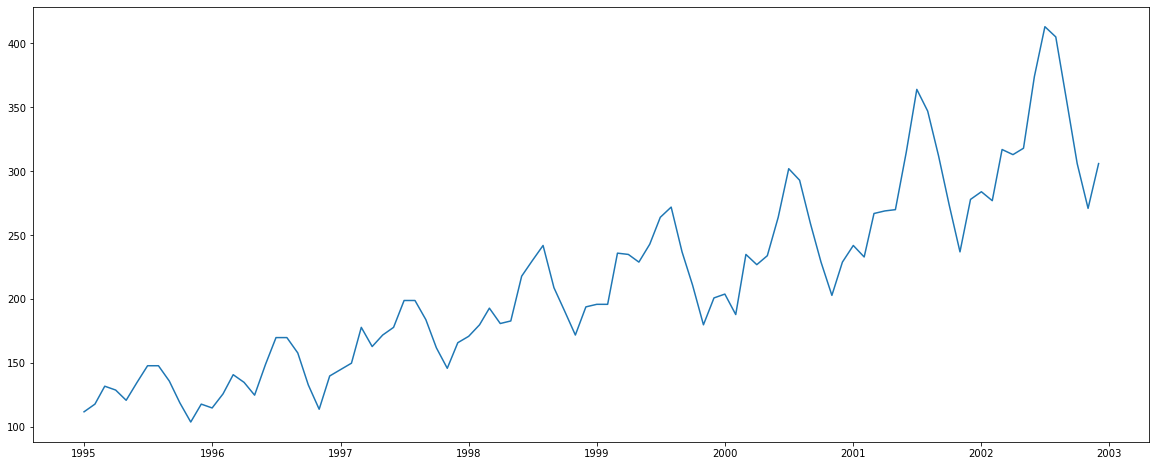

In [5]:
plt.figure(figsize = (20,8))
plt.plot(df)

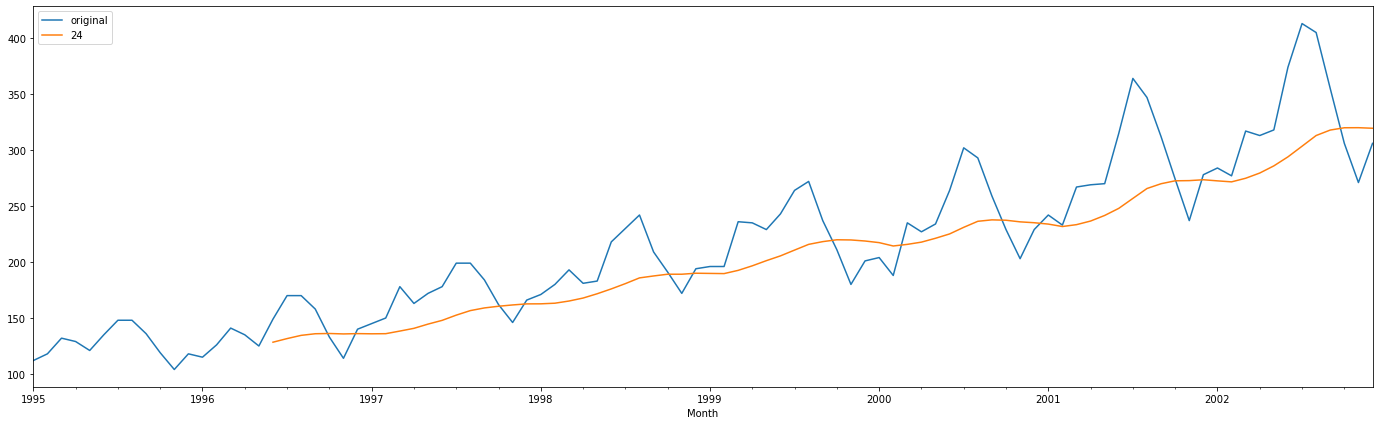

In [6]:
# Moving Average
plt.figure(figsize=(24,7))
df['Passengers'].plot(label="original")
df['Passengers'].rolling(18).mean().plot(label = str(24))
plt.legend(loc='best')

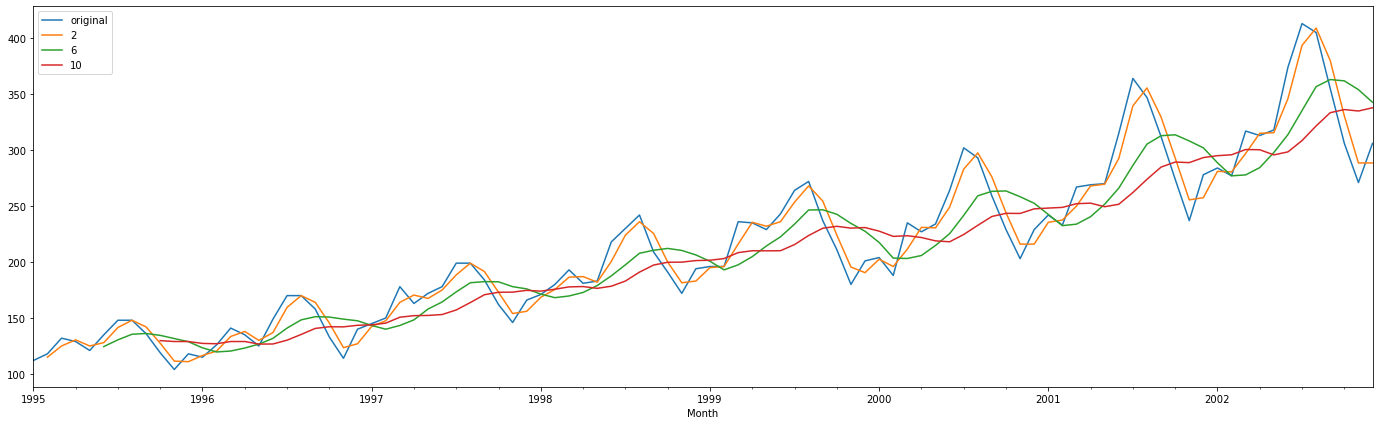

In [7]:
plt.figure(figsize=(24,7))
df['Passengers'].plot(label="original")
for i in range(2,12,4):
    df['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<AxesSubplot:ylabel='Density'>

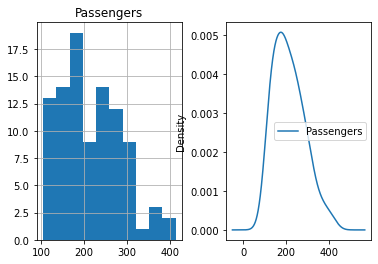

In [8]:
fig, axes = plt.subplots(1, 2)
df.hist(ax=axes[0])
df.plot(kind="kde",ax=axes[1])

In [9]:
series = pd.read_excel("Airlines+Data.xlsx",
                  header=0,
                  index_col=0,
                  parse_dates=True,
                  squeeze=True)
series

C:\Users\cpakh\AppData\Local\Temp\ipykernel_16624\1074351474.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_excel("Airlines+Data.xlsx",


Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [10]:
groups = series.groupby(pd.Grouper(freq='A'))
groups

In [11]:
years=pd.DataFrame([])
for name, group in groups:
    years[name.year]=group.values
years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<AxesSubplot:>

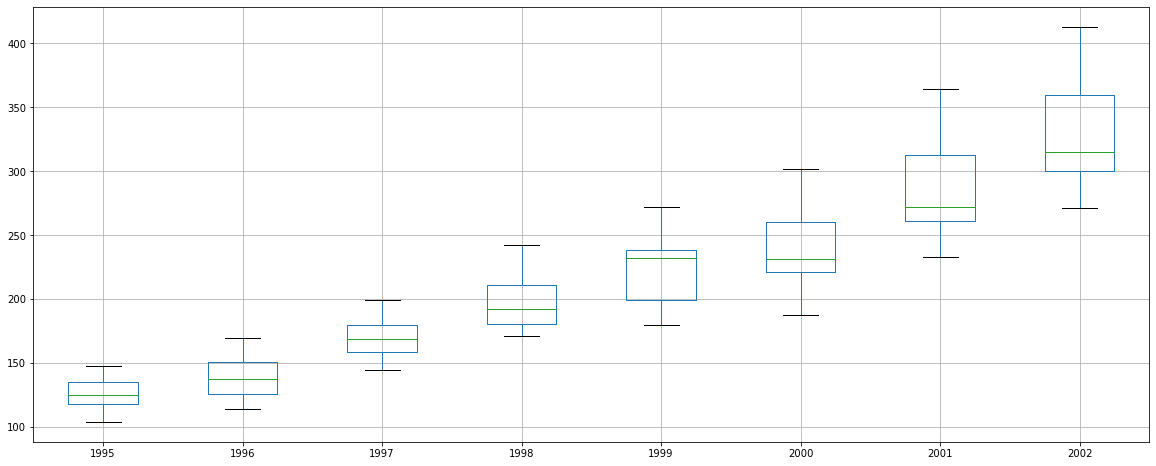

In [12]:
plt.figure(figsize = (20,8))
years.boxplot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

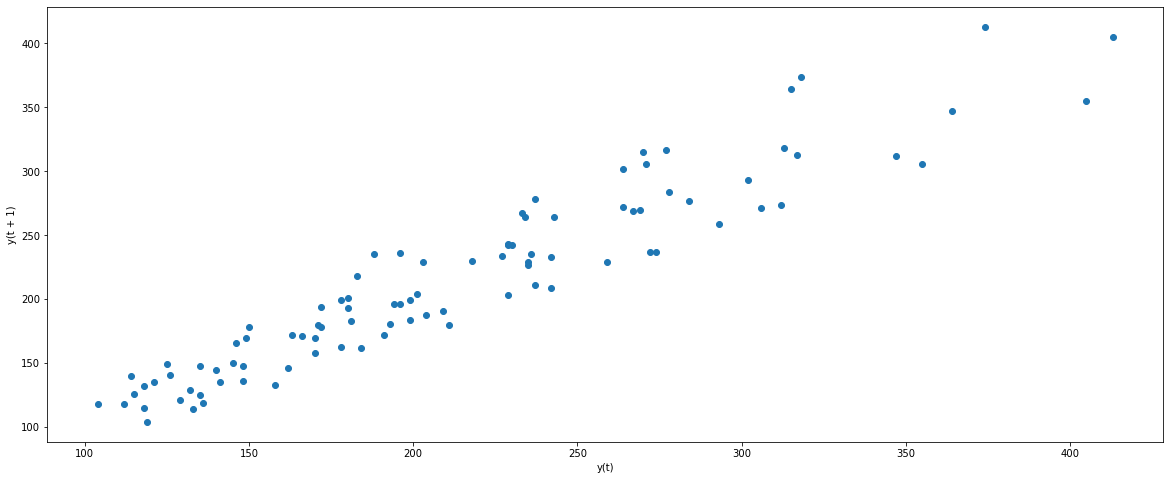

In [13]:
plt.figure(figsize=(20,8))
pd.plotting.lag_plot(series)

<Figure size 4320x1080 with 0 Axes>

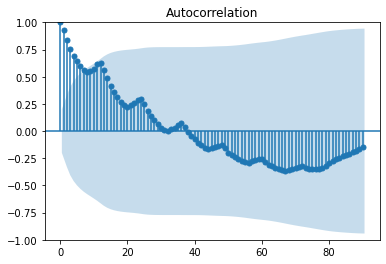

In [14]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (60,15))
plot_acf(series, lags=90)
plt.show()

# Preprocessing on Data

In [15]:
airline=pd.read_excel("Airlines+Data.xlsx",parse_dates=True)

In [16]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [17]:
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [18]:
airline["t"]=np.arange(1,97)

In [19]:
airline["t_sqr"]=np.square(airline["t"])

In [20]:
airline

,Month,Passengers,t,t_sqr
0,1995-01-01,112,1,1
1,1995-02-01,118,2,4
2,1995-03-01,132,3,9
3,1995-04-01,129,4,16
4,1995-05-01,121,5,25
...,...,...,...,...
91,2002-08-01,405,92,8464
92,2002-09-01,355,93,8649
93,2002-10-01,306,94,8836
94,2002-11-01,271,95,9025


In [21]:
airline["month"] = airline['Month'].dt.strftime("%b") # month extraction
airline["Years"] = airline['Month'].dt.strftime("%Y") # month extraction


In [22]:
months = pd.get_dummies(df.index.month_name())

In [23]:
airline=pd.concat((airline,months),axis=1)

In [24]:
airline

,Month,Passengers,t,t_sqr,month,Years,April,August,December,February,January,July,June,March,May,November,October,September
0,1995-01-01,112,1,1,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,16,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,93,8649,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,95,9025,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
heatmap_y_month = pd.pivot_table(data = airline,
                                 values = "Passengers",
                                 index = "Years",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value = 0)
heatmap_y_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Years,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='month', ylabel='Years'>

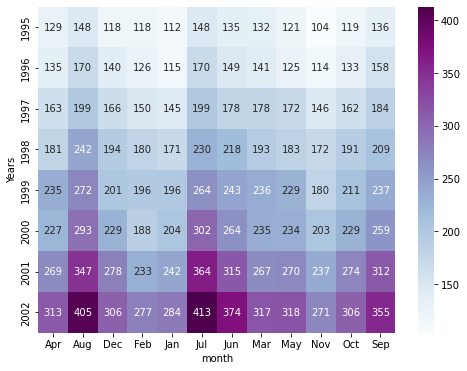

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_y_month,
            annot = True,
            fmt = "g",
            cmap = 'BuPu')

<AxesSubplot:xlabel='Years', ylabel='Passengers'>

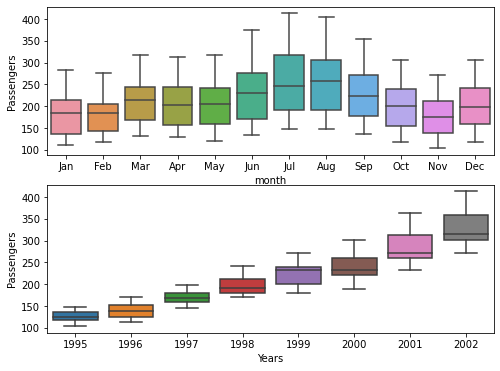

In [27]:
plt.figure(figsize=(8,6))

plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airline)

plt.subplot(212)
sns.boxplot(x="Years",y="Passengers",data=airline)

<AxesSubplot:xlabel='Years', ylabel='Passengers'>

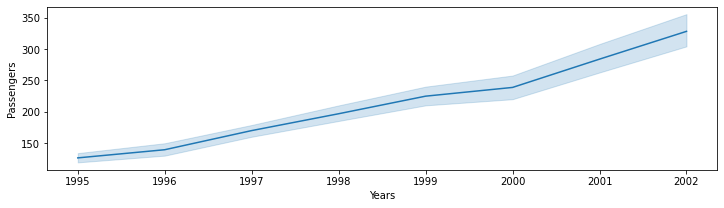

In [28]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Years", y="Passengers", data=airline)

# Spliting Data

In [29]:
airline.shape

(96, 18)

In [30]:
Train=airline.head(70)

In [31]:
Test=airline.tail(26)

# Model Building

In [32]:
# Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers ~ t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

48.30985585336209

In [33]:
#Exponential
Exp = smf.ols('np.log(Passengers) ~ t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.47847070446902

In [34]:
#Quadratic 
Quad = smf.ols('Passengers ~ t + t_sqr',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sqr"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.89814496742656

In [35]:
#Additive seasonality 
add_sea = smf.ols('Passengers~January+February+March+April+May+June+July+August+September+October+November',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[["January","February","March","April","May","June","July","August","September","October","November"]]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

124.97569951828817

In [36]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_sqr+January+February+March+April+May+June+July+August+September+October+November',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

30.393042895911226

In [37]:
##Multiplicative Seasonality
Mul_sea = smf.ols('np.log(Passengers)~January+February+March+April+May+June+July+August+September+October+November',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

129.62914476526242

In [38]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('np.log(Passengers)~t+January+February+March+April+May+June+July+August+September+October+November',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

11.724791415163814

In [39]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('np.log(Passengers)~t+January+February+March+April+May+June+July+August+September+October+November',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

298.1366141717191

In [40]:
#Compare the results 
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.724791
4,rmse_add_sea_quad,30.393043
1,rmse_Exp,43.478471
2,rmse_Quad,43.898145
0,rmse_linear,48.309856
3,rmse_add_sea,124.975700
5,rmse_Mult_sea,129.629145


<AxesSubplot:xlabel='RMSE_Values', ylabel='MODEL'>

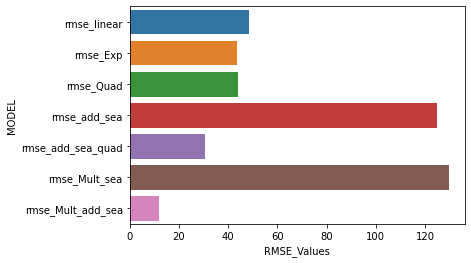

In [41]:
sns.barplot(data=table_rmse,x="RMSE_Values",y="MODEL", orient = 'h')

In [42]:
# Hence Multiplicative Additive Seasonality has lowest RMSE

# Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('np.log(Passengers)~t+January+February+March+April+May+June+July+August+September+October+November',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))


In [43]:
predict_data=pd.DataFrame()

In [44]:
predict_data["forecasted_Passengers"] = pd.Series(np.exp(pred_Mult_add_sea))
new_var = pd.concat([Train,predict_data])

In [45]:
predict_data

,forecasted_Passengers
70,210.545279
71,241.740987
72,246.306569
73,252.417812
74,292.016010
75,279.744907
76,276.419919
77,309.302014
78,342.188462
79,345.078228


In [46]:
len(Train),len(predict_data)

(70, 26)

<AxesSubplot:>

<Figure size 1440x360 with 0 Axes>

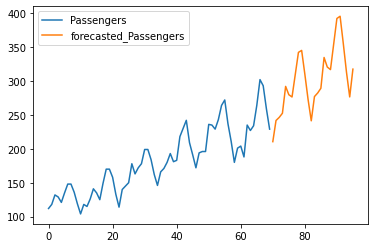

In [47]:
plt.figure(figsize = (20,5))
new_var[['Passengers','forecasted_Passengers']].reset_index(drop=True).plot()

# Data Driven Models

In [48]:

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # Single Exponential Smoothing
from statsmodels.tsa.holtwinters import Holt # Holts (Double) Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing #Holt Winter's (Triple) Exponential Smoothing 

### Time series decomposition plot

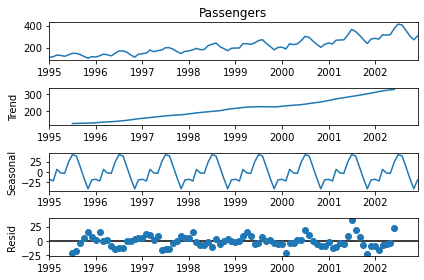

In [49]:
decompose_ts_add = seasonal_decompose(df["Passengers"], period = 12)
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

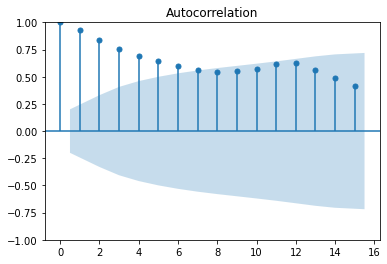

In [50]:
tsa_plots.plot_acf(df["Passengers"],lags=15)
plt.show()

E:\Anaconda\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


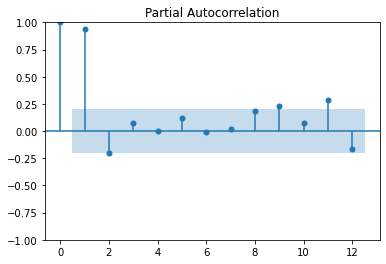

In [51]:
tsa_plots.plot_pacf(df["Passengers"],lags=12)
plt.show()

### Evaluation Metric MAPE

In [52]:
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [53]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level = 0.9) # alpha = 0.9
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_ses, Test['Passengers'])

21.16277779459701

### Holt method 

In [54]:
# Holt method
# aplha = 0.8, beta = 0.2
hw_model = Holt(Train["Passengers"]).fit(smoothing_level = 0.8, smoothing_slope = 0.2)
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hw, Test['Passengers'])

C:\Users\cpakh\AppData\Local\Temp\ipykernel_16624\1265830303.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level = 0.8, smoothing_slope = 0.2)


34.726305475588894

### Holts winter exponential smoothing with additive seasonality and additive trend


In [55]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"], seasonal="add", trend="add", seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

10.305970347762699

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [56]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"], seasonal="mul", trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

9.102313994880598

## Final Model by combining train and test

In [57]:
hwe_model_mul_add = ExponentialSmoothing(airline["Passengers"], seasonal="mul", trend="add",seasonal_periods=12).fit() 
#Forecasting for next 10 time periods
x=hwe_model_mul_add.forecast(20)

In [58]:
final_predict_data=pd.DataFrame()
final_predict_data["forecasted_Passengers"] = pd.Series(x)
new = pd.concat([airline,final_predict_data])

<AxesSubplot:>

<Figure size 1440x360 with 0 Axes>

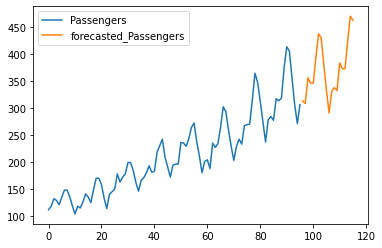

In [59]:
plt.figure(figsize = (20,5))
new[['Passengers','forecasted_Passengers']].reset_index(drop=True).plot()